In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lib_detection import load_model, detect_lp, im2single
import keras
import tensorflow
from keras.models import model_from_json
from keras.models import Sequential

In [209]:
wpod_net_path = "wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)
model = Sequential()
json_file = open('/content/License_plate_nvidia.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('/content/License_plate_nvidia.h5')

In [217]:
def sort_contours(cnts, method="top-to-bottom"):

    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts)

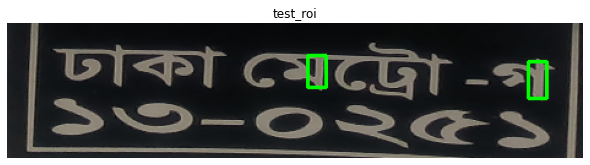

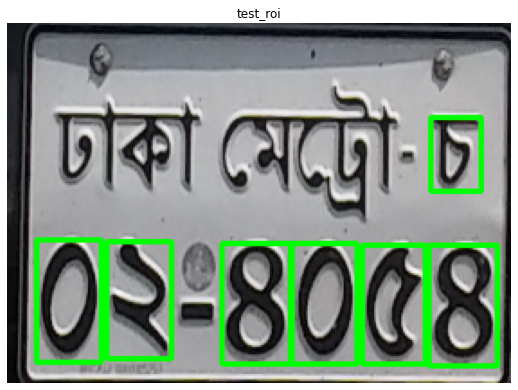

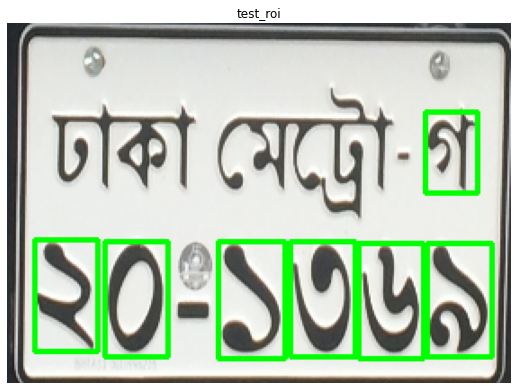

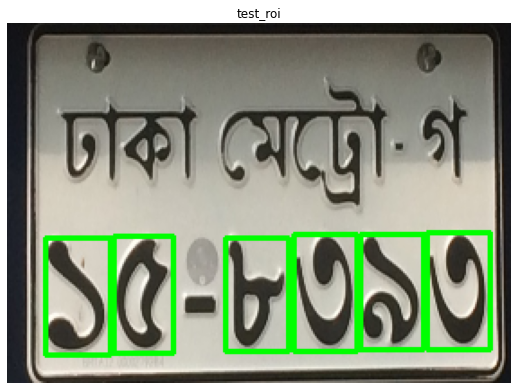

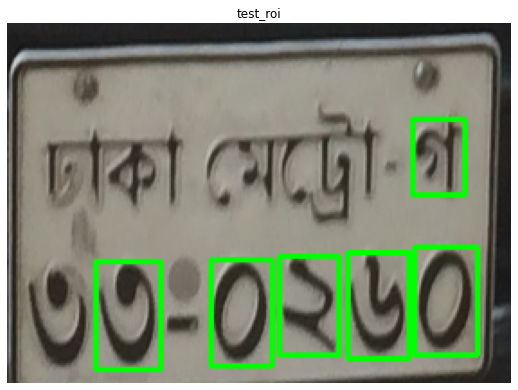

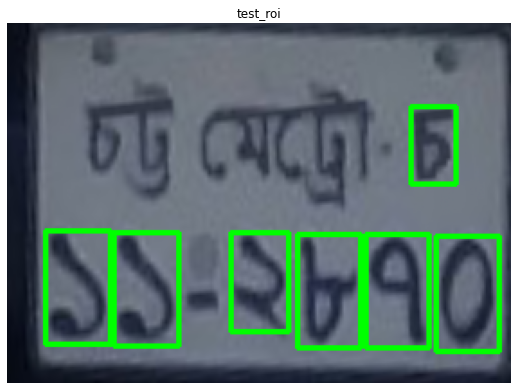

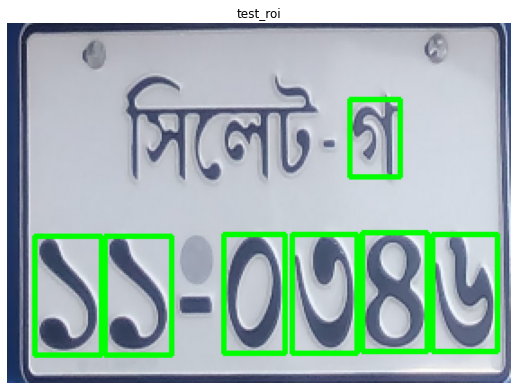

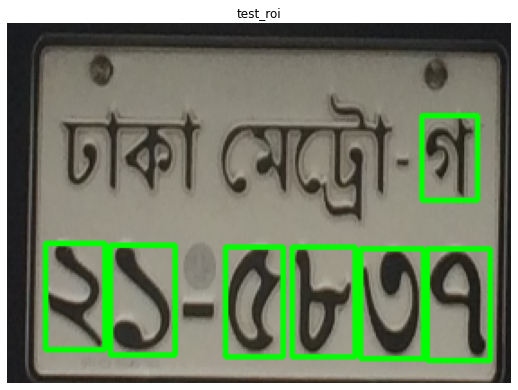

In [227]:


def detect_plate(vehicle):


  Dmax = 608
  Dmin = 288

  ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
  side = int(ratio * Dmin)
  bound_dim = min(side, Dmax)

  L , LpImg, lp_type = detect_lp(wpod_net, im2single(vehicle), bound_dim, lp_threshold=0.5)
# print("Detect %i plate(s)"%len(LpImg))


  if (len(LpImg)):

    # Scales, calculates absolute values, and converts the result to 8-bit.
      plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))

      roi = LpImg[0]

    # convert to grayscale
      gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
      blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary 
      binary = cv2.threshold(blur, 180, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
  cont, _  = cv2.findContours(thre_mor, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  digit_w = 30
  digit_h = 60 

  plate_info = ""

# crop 
  test_roi = roi.copy()
  crop_digits = []

  for c in sort_contours(cont):
      (x, y, w, h) = cv2.boundingRect(c)
      ratio = h/w
      if 1.4<=ratio<=2: # Only select contour with defined ratio
          if (h/roi.shape[0]>=0.19):
              cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)
              curr_num = thre_mor[y:y+h,x:x+w]
              curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
              _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
              crop_digits.append(curr_num)

  fig = plt.figure(figsize=(8,5))
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)      
  plt.imshow(test_roi)
  plt.title('test_roi')
#plt.savefig('grab_digit_contour.png',dpi=300)


vehicle_image = plt.imread("/content/bnw.jpg")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/nature.jpg")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/noisy.JPG")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/shdw.JPG")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/side.JPG")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/small.jpg")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/syl.jpg")
detect_plate(vehicle_image)

vehicle_image = plt.imread("/content/wnb.JPG")
detect_plate(vehicle_image)
